

---


Ananda Affan Fattahila        (1301194175) 


---


Maulana Nur                         (1301190402) 

---


Zendy Bramantia Alfareza    (1301194145) 


---






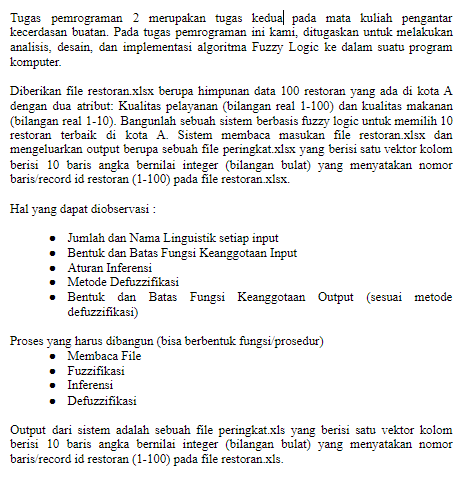

In [ ]:
#instal library untuk menulis file xlsx.
!pip install XlsxWriter

     |████████████████████████████████| 153kB 6.6MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xlsxwriter

In [ ]:
#akses data set dari gdrive
!gdown --id 1jeYsBm8On5KQr0bZqaCEZnKwYtN7XjgY

Downloading...
From: https://drive.google.com/uc?id=1jeYsBm8On5KQr0bZqaCEZnKwYtN7XjgY
To: /content/restoran.xlsx
100% 10.4k/10.4k [00:00<00:00, 24.2MB/s]


In [ ]:
# Prosedur import data  
# Input  : tidak ada
# Output : membaca file xlsx dari gdrive dan merubahnya menjadi array dengan menggunakan library pandas.
def importData():
  arrData = []
  data = pd.read_excel ('https://drive.google.com/uc?id=1jeYsBm8On5KQr0bZqaCEZnKwYtN7XjgY')
  for i in range(len(data['id'])):    
      arrData.append([])   
      arrData[i].append(data['id'][i])
      arrData[i].append(data['pelayanan'][i])
      arrData[i].append(data['makanan'][i])
  return arrData

In [ ]:
# Prosedur Pelayanan
# Input : tidak ada
# Output : menampilkan sebuah grafik fungsi keanggotaan nilai pelayanan
def Pelayanan():
    x1 = [0,40,50,100] 
    y1 = [1,1,0,0] 
  
    x2 = [0,40,50,70,80,100] 
    y2 = [0,0,1,1,0,0]
    
    x3 = [0,70,80,100] 
    y3 = [0,0,1,1]
    
    plt.plot(x1, y1,'r-',label = 'Buruk') 
    plt.plot(x2, y2,'g-',label = 'Biasa') 
    plt.plot(x3, y3,'b-',label = 'Baik')
      
    plt.title('Pelayanan') 
    plt.legend()
    plt.xticks(np.arange(min(x1), max(x1)+1, 10.0))
    plt.show()

In [ ]:
# Prosedur Makanan
# Input : tidak ada
# Output : menampilkan sebuah grafik fungsi keanggotaan rating makanan
def Makanan():    
    x1 = [0,3,5,10] 
    y1 = [1,1,0,0] 
  
    x2 = [0,3,5,7,9,10] 
    y2 = [0,0,1,1,0,0]
    
    x3 = [0,7,9,10] 
    y3 = [0,0,1,1]
    
    plt.plot(x1, y1,'r-',label = 'Tidak Enak') 
    plt.plot(x2, y2,'g-',label = 'Sedang') 
    plt.plot(x3, y3,'b-',label = 'Enak') 
    
    plt.title('Rating Makanan') 
    plt.legend()
    plt.xticks(np.arange(min(x1), max(x1)+1, 2.0))
    plt.show()

In [ ]:
# Prosedur Nilai Kelayakan
# Input : tidak ada
# Output : menampilkan sebuah grafik nilai kelayakan
def NilaiKelayakan():
    x1 = [0,50,70,100]
    y1 = [1,1,0,0]

    x2 = [0,50,70,100]
    y2 = [0,0,1,1]

    plt.plot(x1, y1,'r-',label = 'Tidak Rekomendasi') 
    plt.plot(x2, y2,'g-',label = 'Rekomendasi') 

    plt.title('Saran') 
    plt.legend()
    plt.xticks(np.arange(min(x1), max(x1)+1, 10.0))
    plt.show()


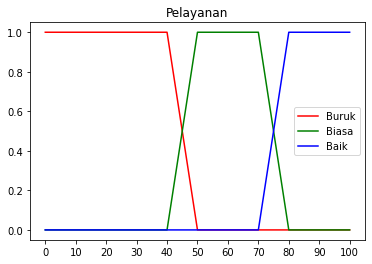

In [ ]:
Pelayanan()

In [ ]:
# Prosedur Fuzzy Pelayanan
# Input : Nilai Pelayanan
# Output : Menghasilkan output nilai buruk, biasa atau baik berdasarkan input
def fuzzyPelayanan(NP):
    
    #Buruk
    if (NP <= 40 ) :
        buruk = 1
    elif (NP >= 50) :
        buruk = 0
    elif (NP > 40 and NP < 50) :
        buruk = (50-NP)/(50-40)
    #Biasa
    if (NP <= 40 or NP >= 80 ) :
        biasa = 0
    elif(NP >= 50 and NP <= 70) :
        biasa = 1
    elif(NP > 40 and NP < 50 ):
        biasa = (NP-40)/(50-40)
    elif(NP > 70 and NP < 80):
        biasa = (80-NP)/(80-70)
    #Baik
    if(NP <= 70):
        baik = 0
    elif(NP >= 80):
        baik = 1
    elif(NP > 70 and NP < 80):
        baik = (NP-70)/(80-70)
    return round(buruk,3),round(biasa,3),round(baik,3)

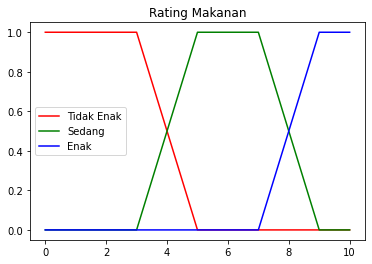

In [ ]:
Makanan()

In [ ]:
# Prosedur Fuzzy Makanan
# Input : Nilai kelayakan
# Output : Menghasilkan output nilai tidak ennak, sedang atau enak berdasarkan input
def fuzzyMakanan(NM):
    #Tidak Enak
    if(NM <= 3):
        tidakenak = 1
    elif(NM >= 5):
        tidakenak = 0
    elif(NM > 3 and NM < 5):
        tidakenak = (5-NM)/(5-3)
    #Sedang
    if (NM <= 3 or NM >= 8):
        sedang = 0
    elif(NM >= 5 and NM <= 7):
        sedang = 1
    elif(NM > 3 and NM < 5):
        sedang = (NM-3)/(4-3)
    elif(NM > 7 and NM < 9):
        sedang = (9-NM)/(9-7)
    #Enak
    if(NM <= 7):
        enak = 0
    elif(NM >= 9):
        enak = 1
    elif(NM > 7 and NM < 9):
        enak = (NM-7)/(9-7)
    return round(tidakenak,3),round(sedang,3),round(enak,3)

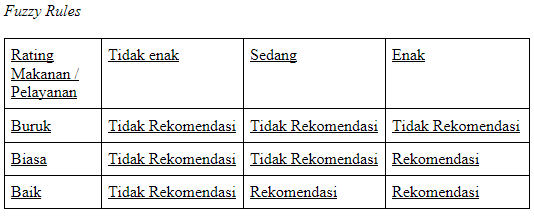

In [ ]:
# Prosedur fuzzy rules
# input  : Nilai pelayanan dan rating makanan yang telah di klasifikasikan berdasarakan fungsi keanggotaan
# output : Sebuah array yang berisi aturan yang telah di buat dan berisi nilai yang telah di inferensi
def fuzzyRules(pelayanan,makanan):
    arrRules =[
        #Buruk, Tidak Enak
        ['TidakRekomendasi',min(pelayanan[0],makanan[0])],
        #Buruk, Sedang
        ['TidakRekomendasi',min(pelayanan[0],makanan[1])],
        #Buruk, Enak
        ['TidakRekomendasi',min(pelayanan[0],makanan[2])],
        #Biasa,Tidak Enak
        ['TidakRekomendasi',min(pelayanan[1],makanan[0])],
        #Biasa, Sedang
        ['TidakRekomendasi',min(pelayanan[1],makanan[1])],
        #Biasa,Enak
        ['Rekomendasi',min(pelayanan[1],makanan[2])],
        #Baik,Tidak Enak
        ['TidakRekomendasi',min(pelayanan[2],makanan[0])],
        #Baik,Sedang
        ['Rekomendasi',min(pelayanan[2],makanan[1])],
        #Baik, Enak
        ['Rekomendasi',min(pelayanan[2],makanan[2])]]
    
    return arrRules

In [ ]:
# Prosedur getFinalResult
# Input  : sebuah array yang berisi kumpulan id dan nilai defuzzyfikasi
# Output : Mendapatkan 10 id terbaik berdasarkan nilai defuzzyfikasi
def getFinalResult(arrResult):
    arrTemp = []
    arr = arrResult[:]
    arr = sorted(arr, key=lambda x: x[1], reverse=True)
    print()
    for i in range (10):
        arrTemp.append(arr[i][0])
    return arrTemp

In [ ]:
# Prosedur inferensi
# input   : sebuah array rules yang didapatkan dari nilai pelayanan dan rating makanan
# output  : sebuah nilai kelayakan dari hasil inferensi semua rules
def inference(arrRules):
    arrRekomendasi = []
    arrTidakRekomendasi = []
    for x in range(len(arrRules)):
        if(arrRules[x][0] == 'Rekomendasi'):
            arrRekomendasi.append(arrRules[x][1])
        elif(arrRules[x][0] == 'TidakRekomendasi'):
            arrTidakRekomendasi.append(arrRules[x][1])
    return max(arrRekomendasi),max(arrTidakRekomendasi)

In [ ]:
NilaiKelayakan()

In [ ]:
# Prosedur deFuzzy
# Input : sebuah array yang berisi hasil inferensi dari suatu restoran
# Output : Menghasilkan nilai dari proses deFuzzyfikasi dengan menggunakan metode Center of Gravitasi
def deFuzzy(arrInference):
    kiri = 0
    kanan = 0
    total = 0
    mamdani = [10,20,30,40,50,70,80,90,100]
    for i in range(len(mamdani)):
        if (mamdani[i] <= 50):
            kiri   = kiri   + (mamdani[i] * arrInference[0])
            total = total + arrInference[0]
        elif (mamdani[i]>= 70):
            kanan  = kanan  + (mamdani[i] * arrInference[0])
            total = total + arrInference[1]
   
    return (kanan + kiri)/total 


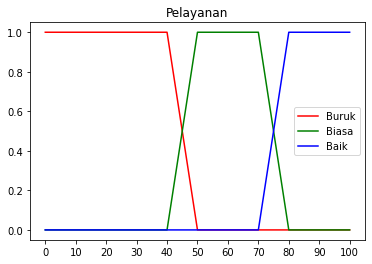

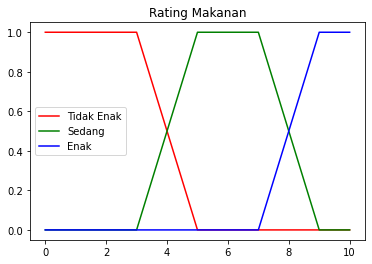

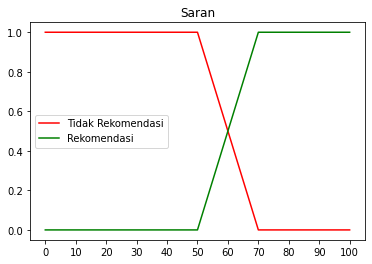


id: [6, 7, 16, 22, 24, 25, 27, 31, 42, 54]


In [ ]:
# Program Main Mamdani

#import data dari dataset
datarestoran = importData()

#menampilkan grafik
Pelayanan()
print()
Makanan()
print()
NilaiKelayakan()

#proses fuzzyfikasi untuk rating makanan dan nilai pelayanan
arrFuzzyP = []
for i in range(len(datarestoran)):
    arrFuzzyP.append(fuzzyPelayanan(datarestoran[i][1]))
arrFuzzyM = []
for i in range(len(datarestoran)):
    arrFuzzyM.append(fuzzyMakanan(datarestoran[i][2]))

arrFinalResult = []

#proses untuk mendapatkan array id restoran dan nilai defuzzy
for i in range(len(datarestoran)):
    #mendapatkan aturan untuk melakukan inferensi
    fuzzy = fuzzyRules(arrFuzzyP[i],arrFuzzyM[i])
    #mendapatkan nilai kelayakan untuk di hitung dalam defuzzy
    infer = inference(fuzzy)
    #mendapatkan nilai defuzzy
    arrFinalResult.append([i+1,deFuzzy(infer)])
    
#mendapatkan 10 restoran terbaik dan menampilkannya
arrFinalResult = getFinalResult(arrFinalResult)
print('id:',arrFinalResult)

#membuat file xlsx 
workbook = xlsxwriter.Workbook('peringkat.xlsx')
worksheet = workbook.add_worksheet("The Data")
worksheet.write(0,0,'id')
start = 1 
for i in range(10):
    worksheet.write(start,0,arrFinalResult[i])
    start += 1

workbook.close()